In [1]:
# /// script
# dependencies = [
#   "openai>=1.59.0",
# ]
# requires-python = ">=3.10"
# ///
from openai import OpenAI
client = OpenAI()

my_assistant = client.beta.assistants.create(
    instructions="You are a research assistant. You answer questions about any topic, and when necessary, you write and run Python code to generate any files you need.",
    name="Personal Research Assistant",
    tools=[{"type": "code_interpreter"}, {"type": "file_search"}],
    model="gpt-4o",
)
print(my_assistant)

thread = client.beta.threads.create()

message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Generate a graph for the sin of a function in 4 different ways and place it into a nice square dashboard image."
)

print(message)

run = client.beta.threads.runs.create_and_poll(
    thread_id=thread.id,
    assistant_id=my_assistant.id,
    instructions="Address the user as Lucas S.",
)

print(run)

if run.status == 'completed': 
    messages = client.beta.threads.messages.list(
    thread_id=thread.id
    )
    print(messages)
else:
    print(run.status)

Assistant(id='asst_zfJsjWLhdpNURgLWlyFDFwwO', created_at=1736697177, description=None, instructions='You are a research assistant. You answer questions about any topic, and when necessary, you write and run Python code to generate any files you need.', metadata={}, model='gpt-4o', name='Personal Research Assistant', object='assistant', tools=[CodeInterpreterTool(type='code_interpreter'), FileSearchTool(type='file_search', file_search=FileSearch(max_num_results=None, ranking_options=FileSearchRankingOptions(score_threshold=0.0, ranker='default_2024_08_21')))], response_format='auto', temperature=1.0, tool_resources=ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=ToolResourcesFileSearch(vector_store_ids=[])), top_p=1.0)
Message(id='msg_jVDoKDtrhG4GVMLgJelCUZ18', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Generate a graph for the sin of a function in 4 different ways and place it in

In [4]:
# Access the file ID from the first message's content
file_id = messages.data[0].content[0].image_file.file_id
print(f"File ID: {file_id}")

File ID: file-WcZVGCDHrK7KuBEPfWUcjC


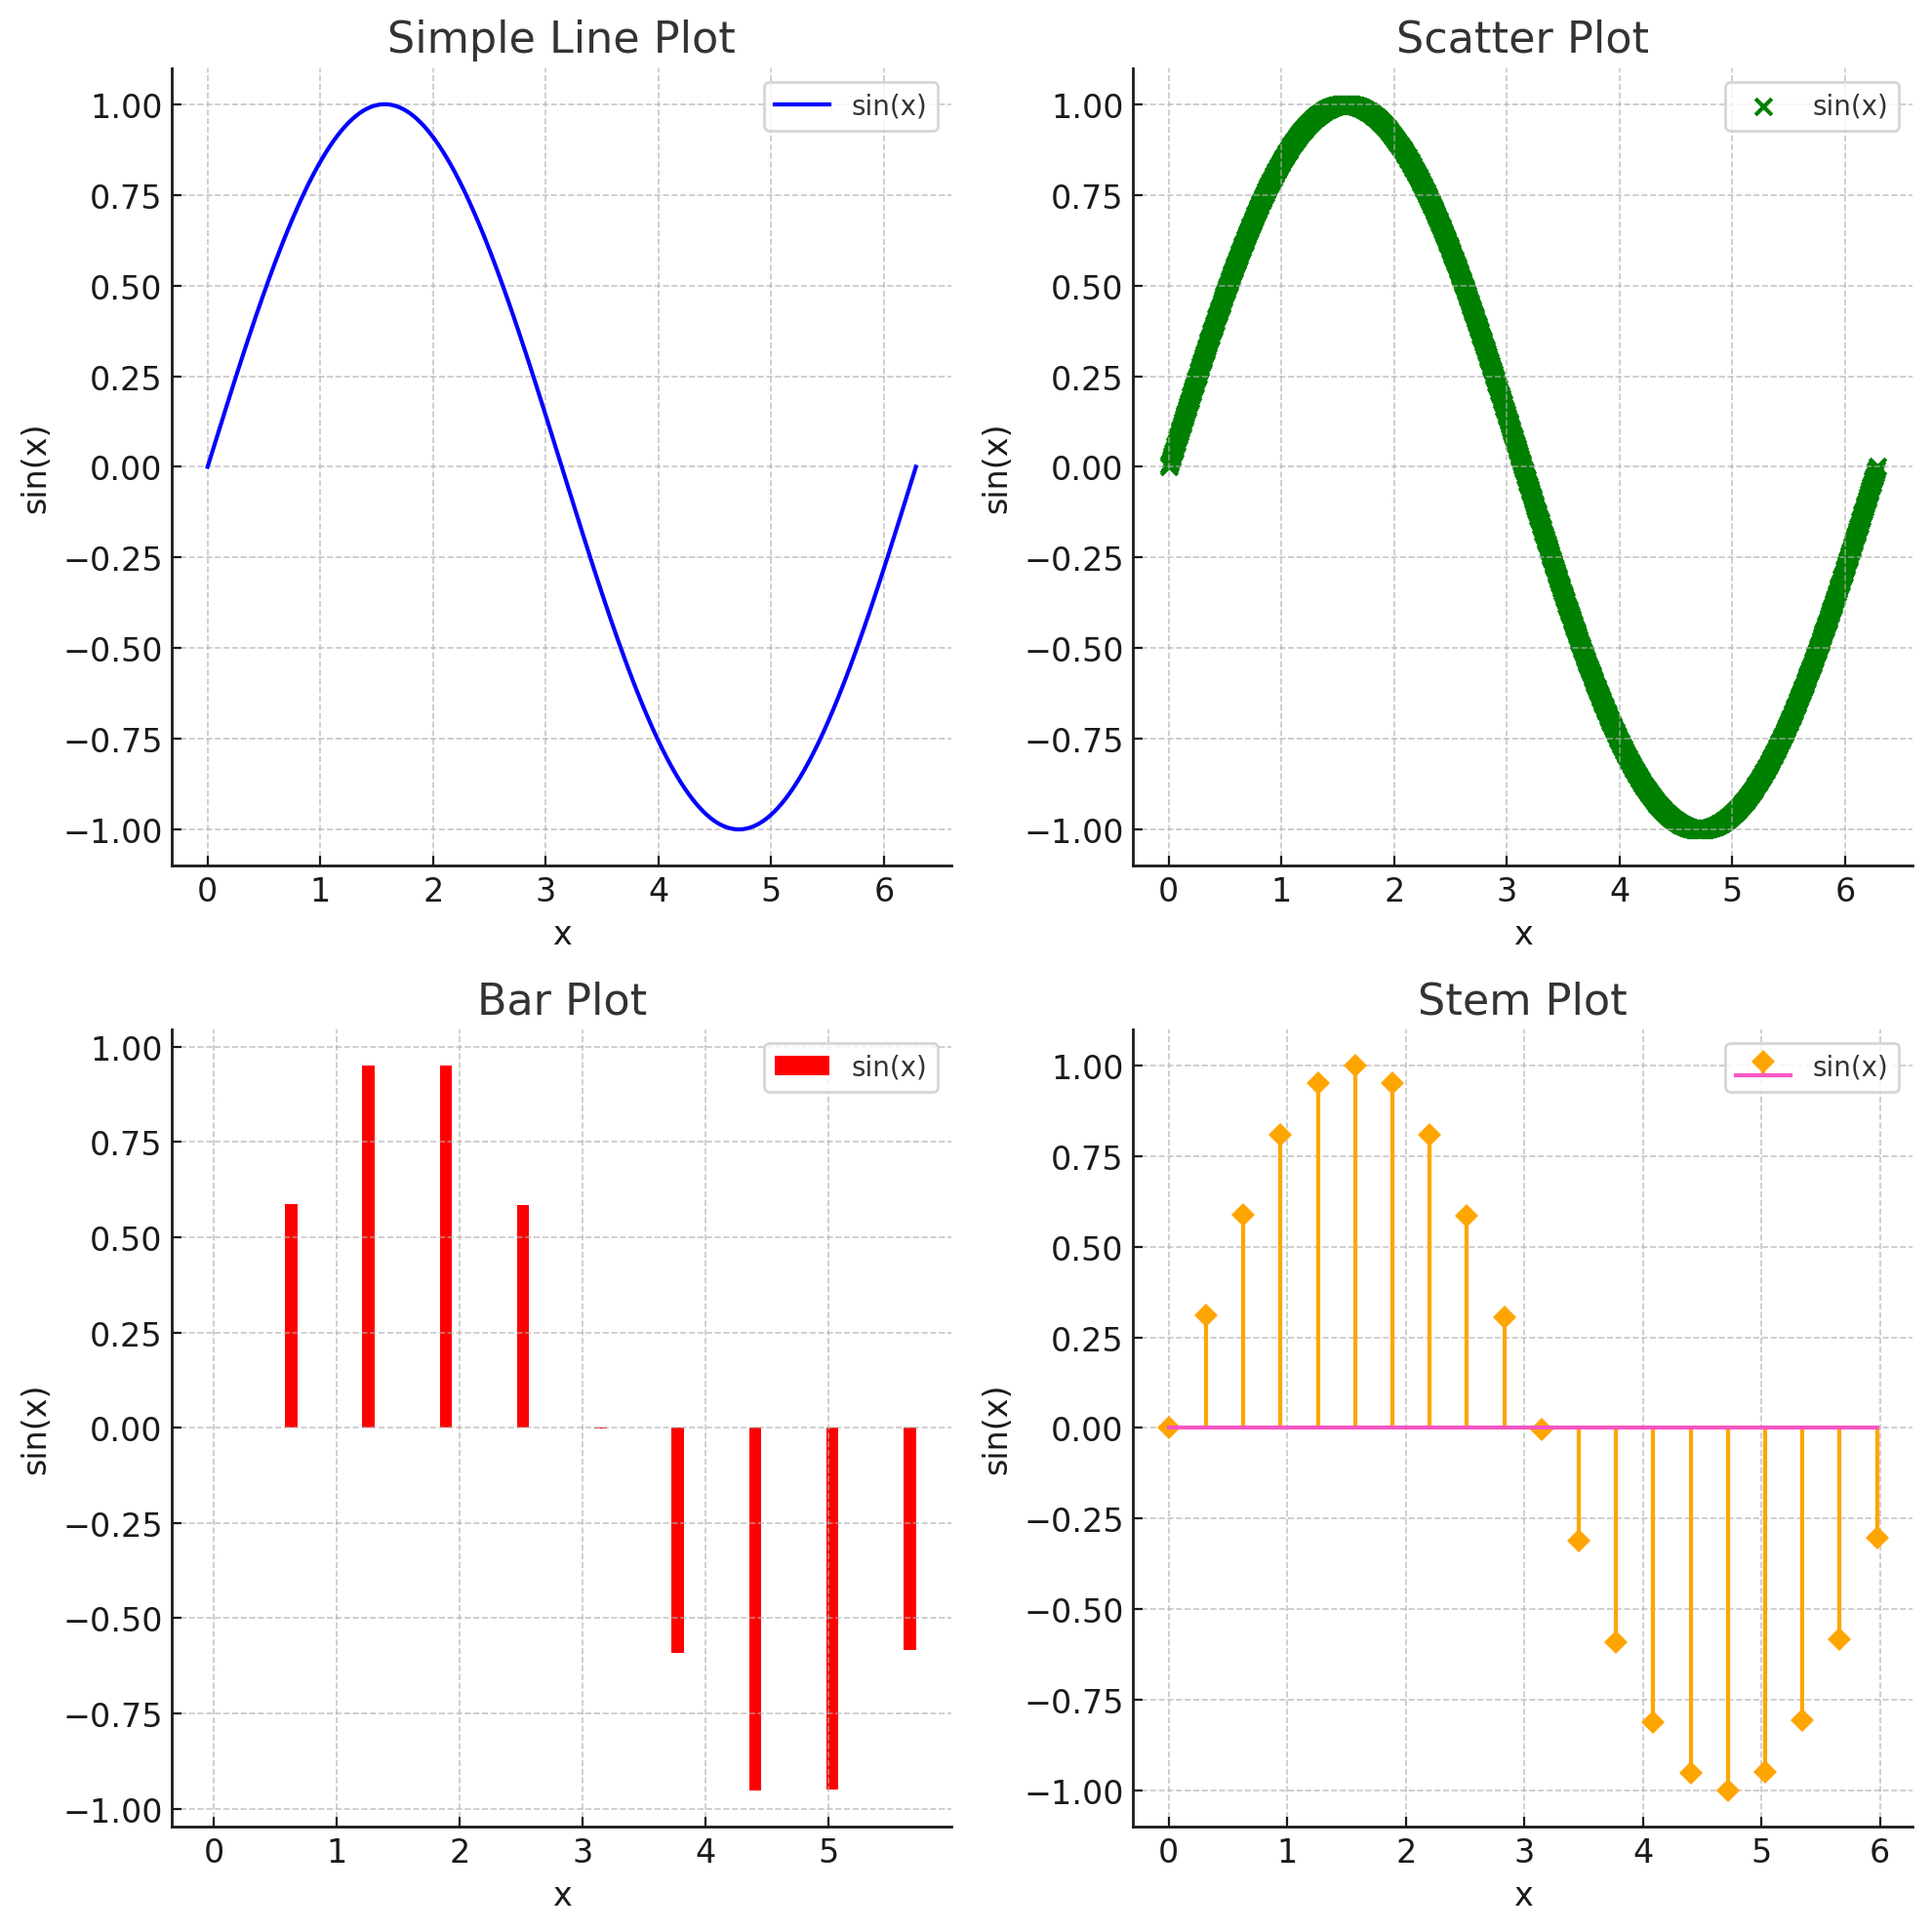

In [5]:
from IPython.display import Image

image_data = client.files.content(file_id)
image_data_bytes = image_data.read()

Image(image_data_bytes)